In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('figure', figsize=(10,5))
sns.set_theme(style='darkgrid')
sns.set_palette('plasma')

In [3]:
customer_service_df = pd.read_excel("../raw_data/Customer_Churn_Data_Large.xlsx", sheet_name='Customer_Service')
customer_service_df.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


In [4]:
customer_service_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        1002 non-null   int64         
 1   InteractionID     1002 non-null   int64         
 2   InteractionDate   1002 non-null   datetime64[ns]
 3   InteractionType   1002 non-null   object        
 4   ResolutionStatus  1002 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.3+ KB


There are no null values in the dataset and all columns seems to be of the correct datatype.

In [5]:
customer_service_df.describe(include='object').T
# descriptive statistics of the dataset
# only including caegorical variables since descriptive statistics of numerical variables are trivial.

,count,unique,top,freq
InteractionType,1002,3,Feedback,360
ResolutionStatus,1002,2,Resolved,523


In [6]:
customer_service_df.duplicated().sum()
# checking for duplicates

np.int64(0)

In [7]:
# The InteractionID is a trivial column and can be dropped
customer_service_df.drop(columns=['InteractionID'], inplace=True)

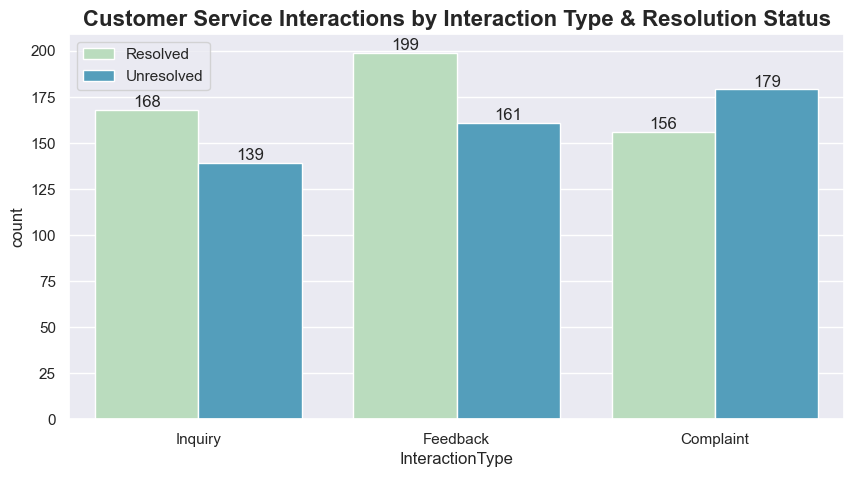

In [8]:
ax = sns.countplot(customer_service_df, x='InteractionType', hue='ResolutionStatus', palette='GnBu')
plt.title('Customer Service Interactions by Interaction Type & Resolution Status', fontsize=16, fontweight='bold')
plt.legend(loc='upper left')

# Add count values on top of each bar
for container in ax.containers:
    ax.bar_label(container)

The Customer Service interactions also seem uniform in number. There is a greater number of resolved feedbacks, but overall the data is still uniform.

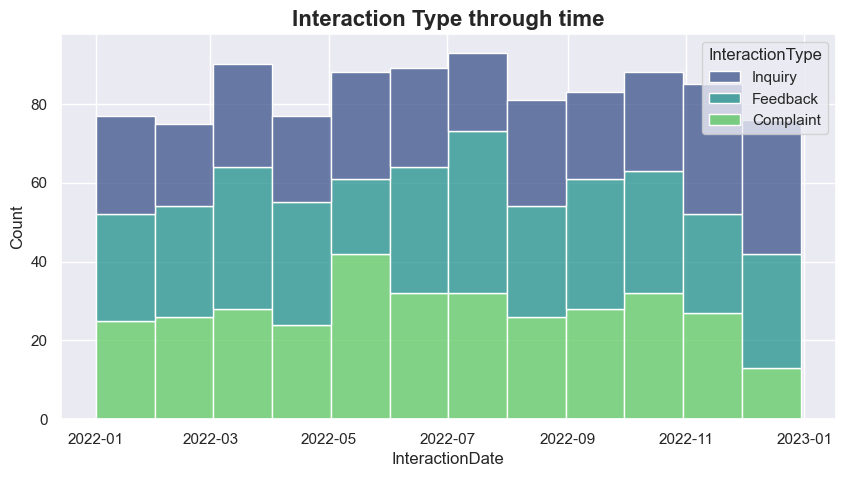

In [9]:
# Interaction Type across time
sns.histplot(customer_service_df, x='InteractionDate',  hue='InteractionType', binwidth=30, multiple='stack', palette='viridis')
plt.title('Interaction Type through time', fontsize=16, fontweight='bold')
plt.show()

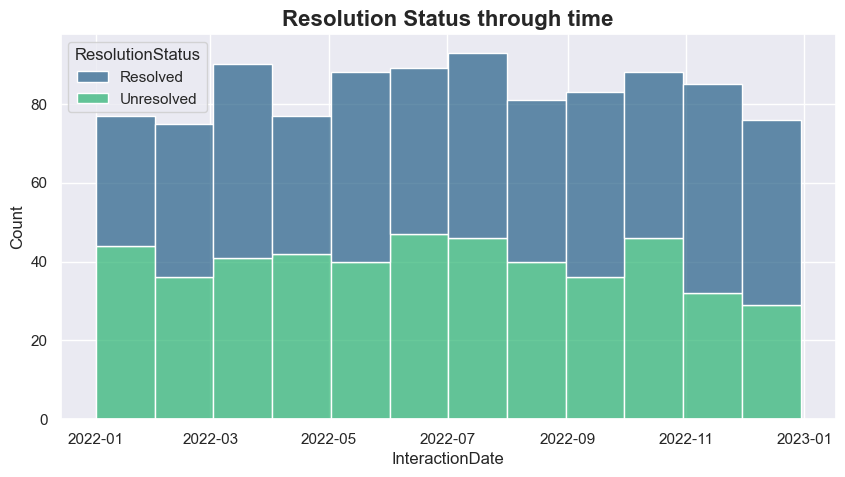

In [10]:
# Resolution Status across time
sns.histplot(customer_service_df, x='InteractionDate',  hue='ResolutionStatus', binwidth=30, multiple='stack', palette='viridis')
plt.title('Resolution Status through time', fontsize=16, fontweight='bold')
plt.show()

The features and their relationship with each other are uniform. The interaction types and Resolution Status have stayed consistent over time.

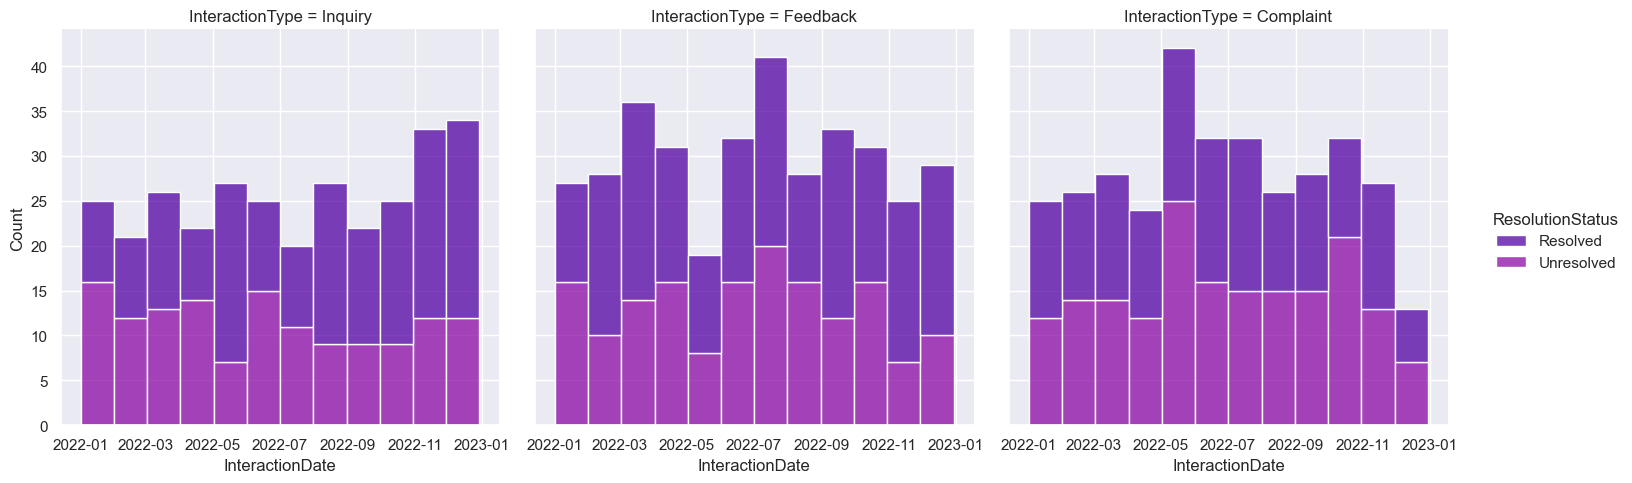

In [11]:
# Interaction Type and Resolution Status across time
sns.displot(customer_service_df, x='InteractionDate', hue='ResolutionStatus', 
            col='InteractionType', kind='hist', multiple='stack', binwidth=30)
plt.show()

The complaints have reduced recently and enquiry resolution have gotten better over time which is shown by the increasing share of 'Resolved' status across categories.  
The Unresolved Enquiries, particularly Complaints could be a significant factor in customer churn.

In [12]:
target_df = pd.read_excel("../raw_data/Customer_Churn_Data_Large.xlsx", sheet_name='Churn_Status')
target_df.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


<Axes: xlabel='ChurnStatus', ylabel='percent'>

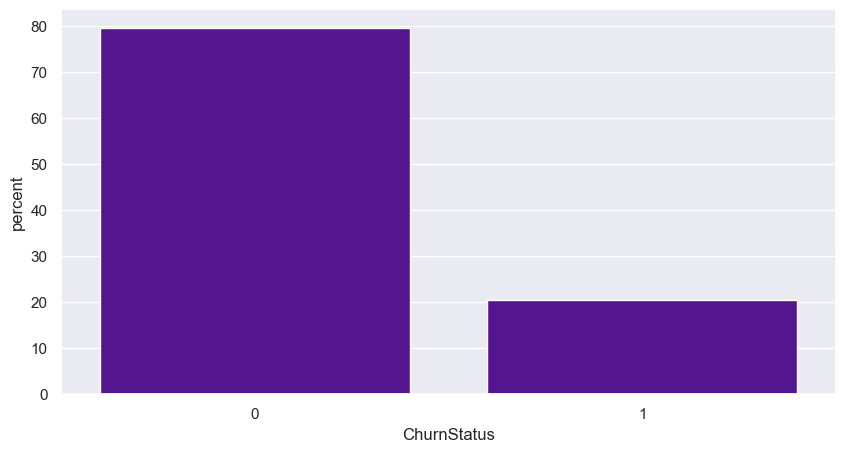

In [13]:
sns.countplot(x=target_df['ChurnStatus'], stat='percent')
# this plot shows the number of customers who churned and who did not churn

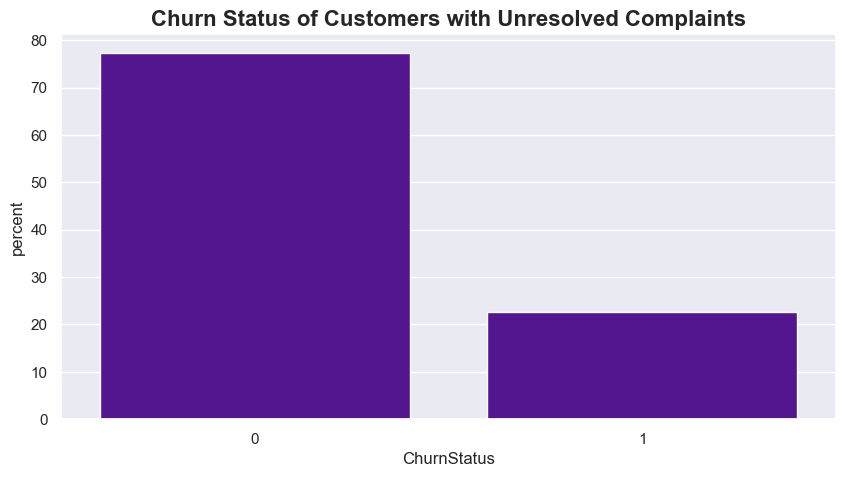

In [14]:
# this plot shows the churn status of customers who have unresolved complaints

Customers_with_unresolved_complaints = customer_service_df[(customer_service_df.ResolutionStatus == 'Unresolved') & 
                                                           (customer_service_df.InteractionType == 'Complaint')]['CustomerID'] 

sns.countplot(target_df[target_df.CustomerID.isin(Customers_with_unresolved_complaints)], x='ChurnStatus', stat='percent')
plt.title('Churn Status of Customers with Unresolved Complaints', fontsize=16, fontweight='bold')
plt.show()

A direct correlation cannot be found between Unresolved complaints and Churn status. It seems to be having roughly the overall proportion of churn status.

In [15]:
# creating feature days since last interaction to the most recent date
customer_service_df['InteractionDate'] = pd.to_datetime(customer_service_df['InteractionDate'])
customer_service_df['DaysSinceLastInteraction'] = (customer_service_df['InteractionDate'].max() - customer_service_df['InteractionDate']).dt.days

In [30]:
customer_service_agg_df = customer_service_df.groupby('CustomerID')['DaysSinceLastInteraction'].max().reset_index(name='DaysSinceLastCustomerInteraction')
customer_service_agg_df

,CustomerID,DaysSinceLastCustomerInteraction
0,1,274
1,2,288
2,3,128
3,4,180
4,6,239
...,...,...
663,989,149
664,990,104
665,992,92
666,994,230
